In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.datasets import make_regression
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("water_dataX.csv",encoding='ISO-8859-1',low_memory=False)
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [3]:
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [5]:
data.shape

(1991, 12)

In [6]:
data.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of       STATION CODE  LOCATIONS  STATE   Temp  D.O. (mg/l)     PH  \
0            False      False  False  False        False  False   
1            False      False  False  False        False  False   
2            False      False  False  False        False  False   
3            False      False  False  False        False  False   
4            False      False  False  False        False  False   
...            ...        ...    ...    ...          ...    ...   
1986         False      False  False  False        False  False   
1987         False      False  False  False        False  False   
1988         False      False  False  False        False  False   
1989         False      False  False  False        False  False   
1990         False      False  False  False        False  False   

      CONDUCTIVITY (µmhos/cm)  B.O.D. (mg/l)  \
0                       False          False   
1                       False        

In [7]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [8]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [9]:
data["Temp"]=pd.to_numeric(data["Temp"],errors='coerce')
data["D.O. (mg/l)"]=pd.to_numeric(data["D.O. (mg/l)"],errors='coerce')
data["PH"]=pd.to_numeric(data["PH"],errors='coerce')
data["CONDUCTIVITY (µmhos/cm)"]=pd.to_numeric(data["CONDUCTIVITY (µmhos/cm)"],errors='coerce')
data["B.O.D. (mg/l)"]=pd.to_numeric(data["B.O.D. (mg/l)"],errors='coerce')
data["NITRATENAN N+ NITRITENANN (mg/l)"]=pd.to_numeric(data["NITRATENAN N+ NITRITENANN (mg/l)"],errors='coerce')
data["TOTAL COLIFORM (MPN/100ml)Mean"]=pd.to_numeric(data["TOTAL COLIFORM (MPN/100ml)Mean"],errors='coerce')

In [10]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [11]:
data["Temp"].fillna(data["Temp"].mean(),inplace=True)
data["D.O. (mg/l)"].fillna(data["D.O. (mg/l)"].mean(),inplace=True)
data["PH"].fillna(data["PH"].mean(),inplace=True)
data["CONDUCTIVITY (µmhos/cm)"].fillna(data["CONDUCTIVITY (µmhos/cm)"].mean(),inplace=True)
data["B.O.D. (mg/l)"].fillna(data["B.O.D. (mg/l)"].mean(),inplace=True)
data["NITRATENAN N+ NITRITENANN (mg/l)"].fillna(data["NITRATENAN N+ NITRITENANN (mg/l)"].mean(),inplace=True)
data["TOTAL COLIFORM (MPN/100ml)Mean"].fillna(data["TOTAL COLIFORM (MPN/100ml)Mean"].mean(),inplace=True)
data.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [12]:
data.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [13]:
data=data.rename(columns={'D.O. (mg/l)':'do'})
data=data.rename(columns={'PH':'ph'})
data=data.rename(columns={'CONDUCTIVITY (µmhos/cm)':'co'})
data=data.rename(columns={'B.O.D. (mg/l)':'bod'})
data=data.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
data=data.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
data=data.rename(columns={'LOCATIONS':'location'})
data=data.rename(columns={'STATION CODE':'station'})
data=data.rename(columns={'STATE':'state'})

In [14]:
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014


In [15]:
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)
                                 else(80 if (8.6>=x>=8.5) or (6.9>=x>=6.8)
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                                else 0)))))


data['ndo']=data.do.apply(lambda x: (100 if (x>=6)
                                  else(80 if (6>=x>=5.1)
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3)
                                              else 0)))))

data['nco']=data.tc.apply(lambda x: (100 if (5>=x>=0)
                                          else(80 if (50>=x>=5)
                                            else(60 if (500>=x>=50)
                                              else(40 if (10000>=x>=500)
                                                else 0)))))


data['nbdo']=data.bod.apply(lambda x: (100 if (3>=x>=0)
                                          else(80 if (6>=x>=3)
                                            else(60 if (80>=x>=6)
                                              else(40 if (125>=x>=80)
                                                else 0)))))

data['nec']=data.co.apply(lambda x: (100 if (75>=x>=0)
                                          else(80 if (150>=x>=75)
                                            else(60 if (225>=x>=150)
                                              else(40 if (300>=x>=225)
                                                else 0)))))

data['nna']=data.na.apply(lambda x: (100 if (20>=x>=0)
                                          else(80 if (50>=x>=20)
                                            else(60 if (100>=x>=50)
                                              else(40 if (200>=x>=100)
                                                else 0)))))

In [16]:
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbdo,nec,nna
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014,100,100,80,60,60,100
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,100,80,40,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,80,100,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,100,80,40,100,80,100


In [17]:
data['wph']=data.npH*0.165
data['wdo']=data.ndo*0.281
data['wbdo']=data.nbdo*0.234
data['wec']=data.nec*0.009
data['wna']=data.nna*0.028
data['wco']=data.nco*0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


In [18]:
average=data.groupby('year')['wqi'].mean()
average.head()

year
2003    66.239545
2004    61.290000
2005    73.762689
2006    72.909714
2007    74.233000
Name: wqi, dtype: float64

In [52]:
x=data.iloc[:,4:11].values
y=data.iloc[:,23:24].values

In [53]:
x.shape

(1991, 7)

In [54]:
y.shape

(1991, 1)

In [55]:
X_train, X_test, y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.2)

In [56]:
rf = RandomForestRegressor(n_estimators=100,random_state=10).fit(X_train, y_train)
pred = rf.predict(X_test)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16188\1316130591.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=100,random_state=10).fit(X_train, y_train)


In [57]:
print('Mae:', metrics.mean_absolute_error(y_test,pred))
print('Mse:', metrics.mean_squared_error(y_test,pred))
print('Rmse:',np.sqrt(metrics.mean_absolute_error(y_test,pred)))

Mae: 0.8570997493734663
Mse: 5.665343525213034
Rmse: 0.9257968186235392


In [58]:
metrics.r2_score(y_test,pred)

0.9691182215189926

In [59]:
import joblib
joblib.dump(rf, "my_random_forest.joblib")

['my_random_forest.joblib']

In [26]:
data2 = data.copy()
data3 = data.copy()
data4 = data.copy()

data2.drop(data2.iloc[:, 3:17], inplace = True, axis = 1)
data2

,station,location,state,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [27]:
data3.drop(data3.iloc[:, 3:11], inplace = True, axis = 1)
data3.drop(data3.iloc[:, 9:], inplace = True, axis = 1)
data3

,station,location,state,npH,ndo,nco,nbdo,nec,nna
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,100,100,80,60,60,100
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,100,80,40,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,80,100,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,0,100,60,100,100,100
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,0,100,60,100,100,100
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,0,100,40,100,100,100
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,0,100,40,100,100,100


In [28]:
data4.drop(data4.iloc[:, 11:], inplace= True, axis = 1)
data4

,station,location,state,Temp,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,2003


<AxesSubplot:>

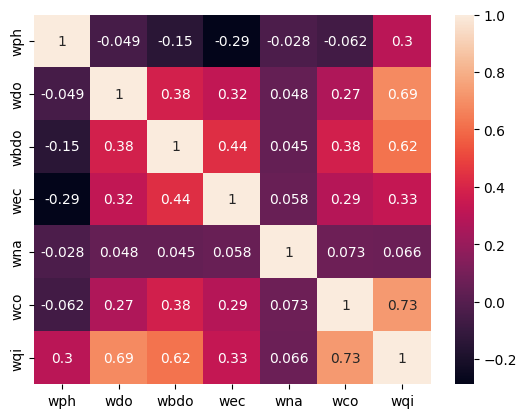

In [29]:
import seaborn as sns

sns.heatmap(data2.corr(), annot = True)


<AxesSubplot:>

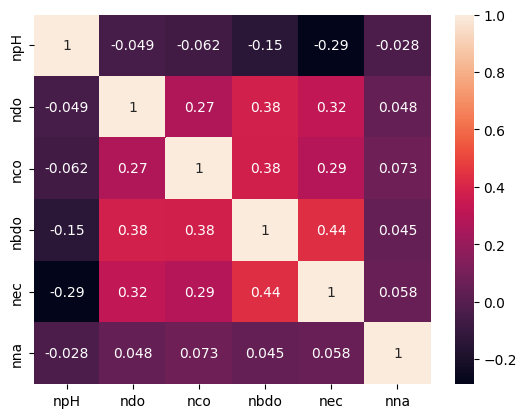

In [30]:
sns.heatmap(data3.corr(), annot = True)

<AxesSubplot:>

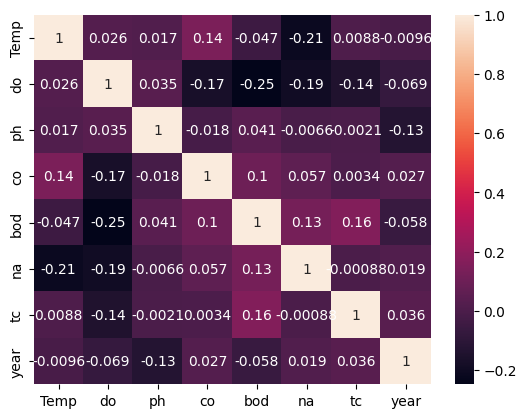

In [31]:
sns.heatmap(data4.corr(), annot = True)

In [32]:
sns.pairplot(data4)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002BF35870670> (for post_execute):


KeyboardInterrupt: 

In [60]:
loaded_rf = joblib.load("my_random_forest.joblib")

In [61]:
pred = loaded_rf.predict(X_test)

In [62]:
metrics.r2_score(y_test,pred)

0.9691182215189926

In [63]:
pred

array([32.273 , 76.6018, 93.82  , 88.2   , 66.7424, 93.82  , 70.6676,
       82.2606, 31.731 , 88.02  , 88.1982, 82.94  , 71.8818, 79.64  ,
       82.94  , 81.2606, 33.9372, 71.378 , 70.337 , 72.9372, 77.7208,
       66.442 , 82.04  , 82.58  , 85.2564, 31.944 , 83.5296, 61.407 ,
       72.1484, 88.2018, 65.8768, 74.8288, 88.38  , 50.3046, 85.2564,
       72.0698, 87.66  , 87.66  , 72.8074, 84.1986, 82.04  , 80.022 ,
       72.042 , 45.0896, 88.56  , 71.3418, 68.894 , 91.777 , 66.4346,
       42.4464, 68.7574, 91.452 , 55.7976, 82.94  , 76.387 , 86.017 ,
       82.04  , 71.1418, 78.5886, 70.8   , 83.5218, 61.2484, 88.56  ,
       44.489 , 55.82  , 87.7014, 79.5842, 71.0944, 66.4588, 82.98  ,
       92.8828, 93.64  , 83.52  , 87.66  , 72.86  , 88.5078, 82.94  ,
       89.7364, 82.58  , 82.76  , 83.7   , 76.083 , 77.7266, 84.2058,
       88.5024, 64.7928, 63.2148, 83.7   , 94.18  , 70.7364, 76.1834,
       77.757 , 66.4026, 85.5442, 55.8144, 42.3886, 82.76  , 42.5606,
       78.7874, 82.9

In [50]:
len(pred)

399

In [65]:
X_test[0]


array([8.0000e-01, 6.8000e+00, 2.1560e+03, 7.4000e+00, 1.0000e+00,
       2.0733e+04, 2.0070e+03])

In [66]:
X_test[0].shape

(7,)

In [ ]:
#D.O ph cond bod nit tot yr

In [70]:
pred = loaded_rf.predict([X_test[0]])

In [68]:
X_test.shape

(399, 7)

In [69]:
X_test[0].shape

(7,)

In [72]:
pred[0]

32.27300000000001